In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.VERSION
%matplotlib inline

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4884 - acc: 0.8230
Epoch 2/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3663 - acc: 0.8649
Epoch 3/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3308 - acc: 0.8783
Epoch 4/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3077 - acc: 0.8844
Epoch 5/15
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2905 - acc: 0.8916
Epoch 6/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2749 - acc: 0.8972
Epoch 7/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2609 - acc: 0.9012
Epoch 8/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2502 - acc: 0.9046
Epoch 9/15
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2398 - acc: 0.9092
Epoch 10/15
60000/60000 [==============================] - 3s 53us/sample - loss: 

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Loss = %.2f  and test accuracy = %.2f' % (test_loss, test_acc))

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3521 - acc: 0.8836
Loss = 0.35  and test accuracy = 0.88


In [10]:
predictions = model.predict(test_images)

In [11]:
predictions.shape

(10000, 10)

In [12]:
np.max(predictions[0])

0.9956813

In [13]:
np.argmax(predictions[0])

9

In [14]:
predictions[0]

array([4.8453069e-07, 4.6222444e-06, 4.7771755e-07, 2.3645958e-07,
       3.4550951e-09, 1.0443062e-03, 1.1251819e-07, 3.2674288e-03,
       1.0846996e-06, 9.9568129e-01], dtype=float32)

In [15]:
print(class_names[9])

Ankle boot


In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

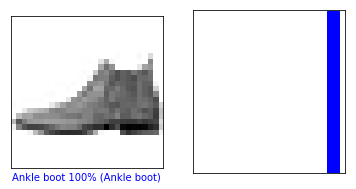

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)